In [17]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [18]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Road/CDI_Based/Intensity/CSV/Canny_No_Filter.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,6120,1785,1020,10965,1530,510,4080,3315,1530,7905,...,1785,510,1020,10965,6630,1785,1785,2550,6120,1
1,42075,59415,47940,46665,66810,49215,35445,33915,36465,33405,...,39270,36720,28305,46665,38760,23205,32130,33405,29070,1
2,142035,140760,193290,183600,217515,211905,200430,199665,161925,164985,...,128520,91545,78795,96390,178500,124950,76755,104295,206040,1
3,58395,51000,186150,187425,72675,27030,25245,144075,157845,24735,...,15555,2805,1275,162945,162690,124950,14790,11475,7905,1
4,69360,85425,62985,52275,44370,30345,22440,29580,46410,41055,...,43860,36720,36975,44625,65280,57375,54570,34680,33405,1


In [19]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [20]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.7021276595744681
              precision    recall  f1-score   support

          -1       0.79      0.79      0.79       101
           1       0.47      0.47      0.48        40

    accuracy                           0.70       141
   macro avg       0.63      0.63      0.63       141
weighted avg       0.70      0.70      0.70       141



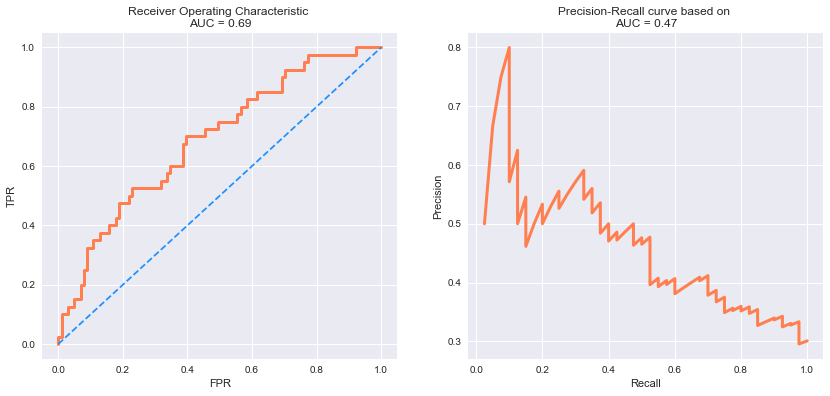

In [21]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()